In [1]:
# Import of necessaries libraries.

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
# Read the data from file
data = pd.read_csv('incomes.csv', nrows=5000)

In [3]:
# Getting data, from Pandas Data Frame.
# That's much faster to work with numpy.array than pandas.DataFrame.
X = data.values

In [6]:
# Reduce of feature number.
# We use PCA firstly to make easier next cumputation -- TSNE.
pca = PCA(n_components=24)
tsne = TSNE(n_components=2, perplexity=17, random_state=0)

np.set_printoptions(suppress=True)

test_pca = pca.fit_transform(X)
test_tsne = tsne.fit_transform(test_pca) 

In [7]:
# Number of clusters.
n = 20

# K-means clusterization.
est = KMeans(n)  
est.fit(test_tsne)
y_kmeans = est.predict(test_tsne)

In [8]:
# Group by cluster every customer.
ids = [[] for i in xrange(n)]

# Looking on cluster number and remember customer id.
row_number = 0
for i in y_kmeans:
    ids[i].append(row_number)
    row_number += 1

In [9]:
# Creating of cluster samples
samples = np.array([set() for i in xrange(n)])
for i in xrange(n):
    for row_number in ids[i]:
        samples[i] = np.hstack((samples[i],X[row_number]))
    # Delete set() from array
    samples[i] = np.delete(samples[i],0,0)

In [38]:
# Cleaning data from 0 values.
# That's not important data for us because it means
# there are not any incomes in this day, but 
# we looking for significant income, so it should be > 0.
cleanData = [[] for i in xrange(n)]
for i in xrange(n):
    for income in samples[i]:
        if income > 0.01: cleanData[i].append(income)

In [40]:
# Creating our features table for every income.
features = np.zeros(data.shape,dtype=int)
for i in xrange(n):
    # Three sigma criteria for cluster N
    threeSigmaEdge = np.mean(cleanData[i]) + 3*np.std(cleanData[i])
    for row in ids[i]:
        for day in xrange(730):
            if X[row][day] >= threeSigmaEdge:
                features[row][day] = 1

In [45]:
# Let's look how many deposits are significant in each cluster by this criteria.
for i in xrange(n):
    counter = 0
    threeSigmaEdge = 3*np.std(cleanData[i])+np.mean(cleanData[i])
    for income in samples[i]:
        if income > threeSigmaEdge: counter += 1
    print 'Cluster %d has %d significant deposits'%(i,counter)

Cluster 0 has 45 significant deposits
Cluster 1 has 56 significant deposits
Cluster 2 has 12 significant deposits
Cluster 3 has 45 significant deposits
Cluster 4 has 33 significant deposits
Cluster 5 has 38 significant deposits
Cluster 6 has 20 significant deposits
Cluster 7 has 20 significant deposits
Cluster 8 has 116 significant deposits
Cluster 9 has 35 significant deposits
Cluster 10 has 19 significant deposits
Cluster 11 has 60 significant deposits
Cluster 12 has 43 significant deposits
Cluster 13 has 56 significant deposits
Cluster 14 has 45 significant deposits
Cluster 15 has 73 significant deposits
Cluster 16 has 78 significant deposits
Cluster 17 has 31 significant deposits
Cluster 18 has 93 significant deposits
Cluster 19 has 48 significant deposits


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

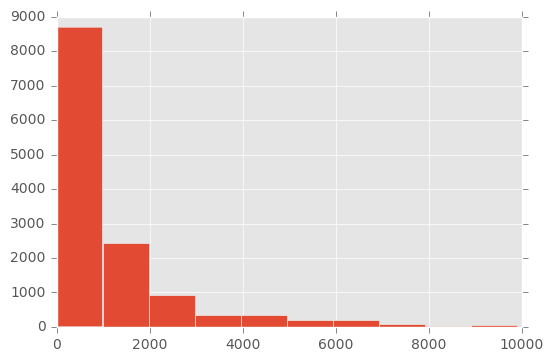

In [52]:
# k є [0;19]
k = 0
m, bins, patches = plt.hist(cleanData[k],range=(0, 0.5*np.std(cleanData[k])+np.mean(cleanData[k])))

In [13]:
from calendar import monthrange

# That's an auxiliary function, which helps us 
# to aggregate data from daily to monthly form 

def getNumberOfDays(startYear,startMonth,endYear,endMonth):
    listOfDays = []
    
    for year in xrange(startYear, startYear + 1):
        for month in xrange (startMonth, 13):
            listOfDays.append(monthrange(year, month)[1])
        
    for year in xrange(startYear + 1, endYear):
        for month in xrange (1, 13):
            listOfDays.append(monthrange(year, month)[1])
    
    for year in xrange(endYear, endYear+1):
        for month in xrange (1, endMonth):
            listOfDays.append(monthrange(year, month)[1])

    return listOfDays

In [41]:
# Aggregating data from daily to monthly form 

monthFeatures = np.zeros((data.shape[0], 24), dtype=int)

monthDays = getNumberOfDays(2014,4,2016,4)
# Shape correction
monthDays [-1] -= 1
entryPoint = 0

for month in xrange(len(monthDays)):
    for row in xrange(features.shape[0]):
        if np.sum(features[row][entryPoint : entryPoint + monthDays[month]]) > 0:
            # We only need to know was it sale fact in this month or not
            # and we don't care how many sales was
            monthFeatures[row][month] = 1
    # Move our entry point to aggragate date for the next month
    entryPoint += monthDays[month]

In [42]:
monthLabel = ['Apr,14','May,14','June,14','July,14','Aug,14','Sep,14','Oct,14','Nov,14','Dec,14','Jan,15'
                ,'Feb,15','Mar,15','Apr,15','May,15','June,15','July,15','Aug,15','Sep,15','Oct,15','Nov,15',
                'Dec,15','Jan,16','Feb,16','Mar,16']

In [43]:
# Final result
pd.DataFrame(monthFeatures, columns=monthLabel)

,"Apr,14","May,14","June,14","July,14","Aug,14","Sep,14","Oct,14","Nov,14","Dec,14","Jan,15",...,"June,15","July,15","Aug,15","Sep,15","Oct,15","Nov,15","Dec,15","Jan,16","Feb,16","Mar,16"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
